In [1]:
#Importing necessary libraries
import numpy as np
import pandas as pd
import geopandas as gpd
from osgeo import gdal
import matplotlib.pyplot as plt 

In [2]:
#Setting path variables to our input and output files
inp_ras_path="C:\\Summer2022\\Marginal-Land-Classification\\Palakkad_Supervised_Landsat\\Data_Preprocessing\\New_Palakkad_Raster.tif"
inp_data_xlsx="C:\\Summer2022\\Marginal-Land-Classification\\Palakkad_Supervised_Landsat\\Data_Preprocessing\\Train_Palakkad.xlsx"
out_ras="C:\\Summer2022\\Marginal-Land-Classification\\Palakkad_Supervised_Landsat\\Data_Preprocessing\\Classification_Results\\Random_Forest_Classified_2.tif"

In [3]:
from sklearn.ensemble import RandomForestClassifier

In [4]:
#Reading the xlsx dataset

In [5]:
df=pd.read_excel(inp_data_xlsx)
df.head()

,Unnamed: 0,Name,Shape_Leng,Shape_Area,geometry,band1,band2,band3,band4,band5,band6
0,0,St,0.002974,4.866600e-07,POINT (76.64307164300004 10.788226620000046),654.013916,858.013916,944.013916,2036.513916,2422.013916,2185.013916
1,1,St,0.002974,4.866600e-07,POINT (76.64277901900005 10.78838195000003),609.496826,835.496826,869.996826,2122.496826,2043.496826,1787.996826
2,2,St,0.002974,4.866600e-07,POINT (76.64298855100003 10.788809429000025),734.508606,1019.008606,1162.008545,2219.008545,2567.508545,2153.508545
3,3,St,0.002974,4.866600e-07,POINT (76.64307477100004 10.788927469000043),734.508606,1019.008606,1162.008545,2219.008545,2567.508545,2153.508545
4,4,St,0.002974,4.866600e-07,POINT (76.64321036300004 10.788880423000023),845.011780,1124.011841,1210.511841,2114.011719,2666.511719,2429.011719


In [6]:
df=df.drop(['Unnamed: 0'],axis=1)
df.head()

,Name,Shape_Leng,Shape_Area,geometry,band1,band2,band3,band4,band5,band6
0,St,0.002974,4.866600e-07,POINT (76.64307164300004 10.788226620000046),654.013916,858.013916,944.013916,2036.513916,2422.013916,2185.013916
1,St,0.002974,4.866600e-07,POINT (76.64277901900005 10.78838195000003),609.496826,835.496826,869.996826,2122.496826,2043.496826,1787.996826
2,St,0.002974,4.866600e-07,POINT (76.64298855100003 10.788809429000025),734.508606,1019.008606,1162.008545,2219.008545,2567.508545,2153.508545
3,St,0.002974,4.866600e-07,POINT (76.64307477100004 10.788927469000043),734.508606,1019.008606,1162.008545,2219.008545,2567.508545,2153.508545
4,St,0.002974,4.866600e-07,POINT (76.64321036300004 10.788880423000023),845.011780,1124.011841,1210.511841,2114.011719,2666.511719,2429.011719


In [7]:
from sklearn.preprocessing import LabelEncoder

In [8]:
le=LabelEncoder()
num_categories=le.fit_transform(df['Name'])
num_categories

array([3, 3, 3, ..., 4, 4, 4])

In [9]:
(le.classes_)

array(['Ag', 'Br', 'Rc', 'St', 'Vg', 'Wt'], dtype=object)

In [10]:
df['Number_Name']=num_categories
df.head()

,Name,Shape_Leng,Shape_Area,geometry,band1,band2,band3,band4,band5,band6,Number_Name
0,St,0.002974,4.866600e-07,POINT (76.64307164300004 10.788226620000046),654.013916,858.013916,944.013916,2036.513916,2422.013916,2185.013916,3
1,St,0.002974,4.866600e-07,POINT (76.64277901900005 10.78838195000003),609.496826,835.496826,869.996826,2122.496826,2043.496826,1787.996826,3
2,St,0.002974,4.866600e-07,POINT (76.64298855100003 10.788809429000025),734.508606,1019.008606,1162.008545,2219.008545,2567.508545,2153.508545,3
3,St,0.002974,4.866600e-07,POINT (76.64307477100004 10.788927469000043),734.508606,1019.008606,1162.008545,2219.008545,2567.508545,2153.508545,3
4,St,0.002974,4.866600e-07,POINT (76.64321036300004 10.788880423000023),845.011780,1124.011841,1210.511841,2114.011719,2666.511719,2429.011719,3


In [11]:
#Segregate the columns required for classification i.e independent variables
train_labels=df[['band1','band2','band3','band4','band5','band6']]
#Selecting the dependent label
dep_label=df['Number_Name']

In [12]:
dep_label

0       3
1       3
2       3
3       3
4       3
       ..
1669    4
1670    4
1671    4
1672    4
1673    4
Name: Number_Name, Length: 1674, dtype: int32

In [13]:
#Using gdal to read the raster file and get properties
raster=gdal.Open(inp_ras_path)

In [14]:
r=raster.RasterYSize
c=raster.RasterXSize
geotransform=raster.GetGeoTransform()
proj=raster.GetProjectionRef()
ras_arr=raster.ReadAsArray()

In [15]:
num_bands=raster.RasterCount

In [16]:
ras_arr

array([[[ 302.36493,  336.91345,  348.9318 , ...,  138.74207,
          138.73117,  140.21135],
        [ 309.90854,  313.42224,  294.9218 , ...,  139.72775,
          133.20668,  136.19824],
        [ 312.889  ,  314.93445,  297.92996, ...,  131.70714,
          131.69638,  133.19931],
        ...,
        [ 449.94327,  399.9475 ,  403.49487, ...,  366.93008,
          357.9387 ,  453.47867],
        [ 369.39   ,  363.39368,  401.98032, ...,  374.38577,
          409.3952 ,  411.41776],
        [ 350.9251 ,  356.40097,  390.44278, ...,  471.44406,
          539.4624 ,  500.4569 ]],

       [[ 537.8649 ,  596.41345,  609.43176, ...,  346.24207,
          353.73117,  358.21133],
        [ 535.9085 ,  551.92224,  566.9218 , ...,  360.72775,
          343.7067 ,  343.19824],
        [ 545.88904,  541.93445,  558.42993, ...,  345.70715,
          354.69638,  361.6993 ],
        ...,
        [ 721.9433 ,  676.9475 ,  695.4949 , ...,  668.93005,
          641.43866,  704.97864],
        [ 66

In [17]:
#Changing the shape of array so that it can be fed into the model
ras_arr=np.stack(ras_arr,axis=2)
ras_arr=np.reshape(ras_arr,[r*c,num_bands])
dataset=pd.DataFrame(ras_arr)
dataset.head()

,0,1,2,3,4,5
0,302.364929,537.864929,401.364929,2980.864990,1630.364868,826.364929
1,336.913452,596.413452,493.913452,2714.413574,1711.913452,991.413452
2,348.931793,609.431763,528.431763,2471.431885,1623.931763,986.931763
3,291.872223,535.872253,416.372223,2749.872314,1429.372192,725.872253
4,306.911499,568.911499,487.411499,2853.911377,1844.911499,980.911499


In [21]:
# #Extracting the results to a tif file
# DONE AND THERE IS NO NEED TO REPEAT IT

In [22]:
#Trying to classify the data again but this time we will scale down the values using the standard scalar and then split the data into train and test and then classify it

In [23]:
#Therefore we are spliting our shapefile inton training and test to get accuracy

In [24]:
df.head()

,Name,Shape_Leng,Shape_Area,geometry,band1,band2,band3,band4,band5,band6,Number_Name
0,St,0.002974,4.866600e-07,POINT (76.64307164300004 10.788226620000046),654.013916,858.013916,944.013916,2036.513916,2422.013916,2185.013916,3
1,St,0.002974,4.866600e-07,POINT (76.64277901900005 10.78838195000003),609.496826,835.496826,869.996826,2122.496826,2043.496826,1787.996826,3
2,St,0.002974,4.866600e-07,POINT (76.64298855100003 10.788809429000025),734.508606,1019.008606,1162.008545,2219.008545,2567.508545,2153.508545,3
3,St,0.002974,4.866600e-07,POINT (76.64307477100004 10.788927469000043),734.508606,1019.008606,1162.008545,2219.008545,2567.508545,2153.508545,3
4,St,0.002974,4.866600e-07,POINT (76.64321036300004 10.788880423000023),845.011780,1124.011841,1210.511841,2114.011719,2666.511719,2429.011719,3


In [25]:
from sklearn.model_selection import train_test_split
shp_train_data,shp_test_data=train_test_split(df,test_size=0.2,random_state=25)
dataset_train,dataset_test=train_test_split(dataset,test_size=0.2,random_state=25)

In [26]:
x_train=shp_train_data[['band1','band2','band3','band4','band5','band6']]
y_train=shp_train_data['Number_Name']

In [27]:
x_test=shp_test_data[['band1','band2','band3','band4','band5','band6']]

In [28]:
y_test=shp_test_data['Number_Name']

In [29]:
shp_train_data.head()

,Name,Shape_Leng,Shape_Area,geometry,band1,band2,band3,band4,band5,band6,Number_Name
708,Br,0.002002,2.606222e-07,POINT (76.70878240300004 10.752208282000026),678.023193,873.523193,1055.023193,2322.523193,3008.023193,1976.523193,1
1338,Vg,0.010956,7.785580e-06,POINT (76.74300587400006 10.839063451000072),184.294144,448.794159,275.294159,2936.794189,1321.294189,562.294128,4
471,Wt,0.006523,1.073099e-06,POINT (76.65055832400003 10.748486885000034),266.882965,512.882996,363.882965,2072.383057,823.382996,392.382965,5
173,St,0.001303,8.882325e-08,POINT (76.64074726000007 10.755745094000076),662.008179,954.508179,1057.508179,2242.508301,2508.508301,2057.508301,3
38,St,0.006752,7.587605e-07,POINT (76.64563999800004 10.777228398000034),677.016724,964.516724,1122.016724,1862.516724,2617.516602,2301.016602,3


In [32]:
rfcl=RandomForestClassifier(n_estimators=51,max_features=6)

In [33]:
rfcl.fit(x_train,y_train)

RandomForestClassifier(max_features=6, n_estimators=51)

In [34]:
clf_res=rfcl.predict(dataset)

C:\Users\Student\miniconda3\envs\earth-analytics-python\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [35]:
res=clf_res.reshape((r,c))

In [36]:
drv=gdal.GetDriverByName("GTiff")
drv.Register()
clf_pal=drv.Create(out_ras,c,r,bands=1,eType=gdal.GDT_Int32)
clf_pal.SetGeoTransform(geotransform)
clf_pal.SetProjection(proj)
clf_pal.GetRasterBand(1).WriteArray(res)
clf_pal.FlushCache()
clf_pal=None 
# THIS STEP IS

In [37]:
new_clf_res=rfcl.predict(x_test)

In [38]:
new_clf_res

array([3, 2, 2, 1, 0, 5, 2, 4, 3, 3, 5, 3, 5, 3, 3, 2, 0, 4, 0, 0, 2, 1,
       3, 4, 2, 4, 4, 4, 1, 3, 3, 1, 4, 4, 3, 2, 4, 4, 3, 5, 3, 0, 4, 2,
       2, 4, 3, 3, 3, 2, 3, 0, 1, 0, 0, 4, 5, 0, 4, 3, 5, 4, 5, 2, 1, 0,
       2, 5, 1, 5, 4, 2, 4, 4, 3, 5, 4, 3, 1, 0, 3, 3, 4, 0, 2, 5, 4, 0,
       2, 1, 5, 2, 4, 2, 0, 3, 0, 4, 0, 0, 5, 5, 4, 5, 5, 4, 4, 4, 2, 2,
       3, 4, 4, 3, 1, 4, 5, 2, 4, 0, 2, 1, 5, 3, 4, 4, 4, 1, 0, 4, 4, 4,
       3, 2, 0, 4, 5, 4, 0, 0, 5, 5, 0, 2, 5, 0, 4, 2, 0, 1, 5, 1, 1, 5,
       5, 4, 0, 0, 5, 5, 1, 0, 4, 4, 5, 3, 3, 4, 0, 1, 5, 3, 3, 3, 4, 4,
       5, 3, 4, 2, 4, 4, 0, 1, 2, 3, 0, 4, 0, 2, 3, 2, 5, 0, 0, 0, 3, 3,
       2, 4, 2, 0, 1, 2, 4, 0, 1, 0, 5, 3, 4, 4, 5, 3, 4, 2, 4, 5, 2, 2,
       3, 0, 2, 3, 0, 0, 4, 5, 4, 4, 5, 4, 3, 5, 5, 2, 3, 5, 0, 3, 4, 5,
       0, 1, 5, 4, 3, 2, 0, 0, 4, 3, 3, 3, 0, 4, 2, 5, 5, 2, 3, 0, 2, 3,
       2, 5, 2, 0, 5, 2, 3, 5, 5, 4, 0, 3, 3, 3, 4, 3, 4, 0, 0, 5, 5, 4,
       4, 3, 2, 4, 4, 2, 2, 4, 3, 2, 0, 3, 5, 0, 4,

In [39]:
min(df['Number_Name'])

0

In [40]:
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix

In [41]:
cf=confusion_matrix(y_test,new_clf_res)

In [42]:
from sklearn.metrics import classification_report
print(classification_report(y_test,new_clf_res))

              precision    recall  f1-score   support

           0       0.95      0.86      0.90        65
           1       0.72      0.82      0.77        22
           2       0.82      0.93      0.87        45
           3       0.88      0.90      0.89        59
           4       0.96      0.96      0.96        81
           5       1.00      0.94      0.97        63

    accuracy                           0.91       335
   macro avg       0.89      0.90      0.89       335
weighted avg       0.92      0.91      0.91       335



In [43]:
disp = ConfusionMatrixDisplay(confusion_matrix=cf,
                               display_labels=['band1','band2','band3','band4','band5','band6'])

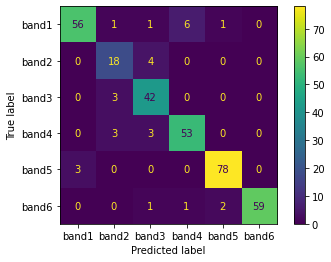

In [44]:
disp.plot()

In [45]:
from sklearn import svm
clfsvc = svm.SVC()
clfsvc.fit(x_train,y_train)
svc_clf_res=clfsvc.predict(x_test)

In [46]:
print(classification_report(y_test,svc_clf_res))

              precision    recall  f1-score   support

           0       0.73      0.94      0.82        65
           1       0.29      0.09      0.14        22
           2       0.65      0.93      0.76        45
           3       0.90      0.75      0.81        59
           4       0.85      0.86      0.86        81
           5       1.00      0.78      0.88        63

    accuracy                           0.80       335
   macro avg       0.74      0.73      0.71       335
weighted avg       0.80      0.80      0.79       335



In [47]:
svccf=confusion_matrix(y_test,svc_clf_res)
dsp = ConfusionMatrixDisplay(confusion_matrix=svccf,
                               display_labels=['band1','band2','band3','band4','band5','band6'])

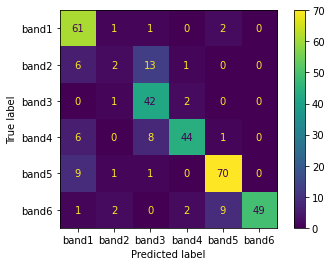

In [48]:
dsp.plot()

In [49]:
from sklearn.metrics import cohen_kappa_score
print(cohen_kappa_score(y_test, new_clf_res),cohen_kappa_score(y_test, svc_clf_res))

0.8940878912424913 0.753706203158091


In [50]:
from sklearn.metrics import matthews_corrcoef
print(matthews_corrcoef(y_test, new_clf_res),matthews_corrcoef(y_test, svc_clf_res))

0.8945678491128066 0.7589380084580221


In [51]:
from sklearn.metrics import accuracy_score
acc=[]
for i in range(1,300):
    rfcl1=RandomForestClassifier(n_estimators=i)
    rfcl1.fit(x_train,y_train)
    y_pred=rfcl1.predict(x_test)
    acc.append(accuracy_score(y_test, y_pred))

Text(0, 0.5, 'Testing Accuracy')

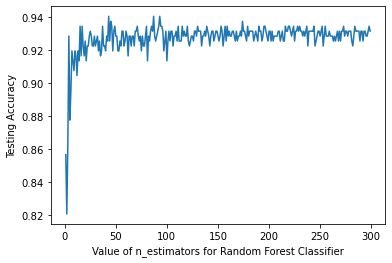

In [52]:
plt.plot(range(1, 300), acc)
plt.xlabel('Value of n_estimators for Random Forest Classifier')
plt.ylabel('Testing Accuracy')


In [53]:
max(acc)

0.9402985074626866

In [54]:
acc.index(max(acc))

42

In [55]:
acc[14]

0.9343283582089552

In [56]:
from sklearn.ensemble import GradientBoostingClassifier

In [57]:
clfgb = GradientBoostingClassifier().fit(x_train, y_train)

In [58]:
clfgb.score(x_test, y_test)

0.9402985074626866

In [59]:
rfcl.score(x_test,y_test)

0.9134328358208955

In [60]:
clfsvc.score(x_test,y_test)

0.8

In [61]:
clf_res

array([4, 4, 4, ..., 1, 0, 2])

In [62]:
dataset

,0,1,2,3,4,5
0,302.364929,537.864929,401.364929,2980.864990,1630.364868,826.364929
1,336.913452,596.413452,493.913452,2714.413574,1711.913452,991.413452
2,348.931793,609.431763,528.431763,2471.431885,1623.931763,986.931763
3,291.872223,535.872253,416.372223,2749.872314,1429.372192,725.872253
4,306.911499,568.911499,487.411499,2853.911377,1844.911499,980.911499
...,...,...,...,...,...,...
571323,288.374847,563.374878,438.874847,2665.874756,1233.874878,542.874878
571324,381.396301,636.396301,519.896301,2839.396240,1493.396362,771.396301
571325,471.444061,706.444092,646.944092,2856.444092,2015.944092,1217.444092
571326,539.462402,758.462402,734.462402,2948.462402,2313.462402,1422.962402


In [63]:
dataset['class']=clf_res
dataset

,0,1,2,3,4,5,class
0,302.364929,537.864929,401.364929,2980.864990,1630.364868,826.364929,4
1,336.913452,596.413452,493.913452,2714.413574,1711.913452,991.413452,4
2,348.931793,609.431763,528.431763,2471.431885,1623.931763,986.931763,4
3,291.872223,535.872253,416.372223,2749.872314,1429.372192,725.872253,4
4,306.911499,568.911499,487.411499,2853.911377,1844.911499,980.911499,4
...,...,...,...,...,...,...,...
571323,288.374847,563.374878,438.874847,2665.874756,1233.874878,542.874878,4
571324,381.396301,636.396301,519.896301,2839.396240,1493.396362,771.396301,4
571325,471.444061,706.444092,646.944092,2856.444092,2015.944092,1217.444092,1
571326,539.462402,758.462402,734.462402,2948.462402,2313.462402,1422.962402,0


In [64]:
dataset.rename(columns = {'0':'BAND1','1':'BAND2','2':'BAND3','3':'BAND4','4':'BAND5','5':'BAND6'}, inplace = True)

In [65]:
dataset

,0,1,2,3,4,5,class
0,302.364929,537.864929,401.364929,2980.864990,1630.364868,826.364929,4
1,336.913452,596.413452,493.913452,2714.413574,1711.913452,991.413452,4
2,348.931793,609.431763,528.431763,2471.431885,1623.931763,986.931763,4
3,291.872223,535.872253,416.372223,2749.872314,1429.372192,725.872253,4
4,306.911499,568.911499,487.411499,2853.911377,1844.911499,980.911499,4
...,...,...,...,...,...,...,...
571323,288.374847,563.374878,438.874847,2665.874756,1233.874878,542.874878,4
571324,381.396301,636.396301,519.896301,2839.396240,1493.396362,771.396301,4
571325,471.444061,706.444092,646.944092,2856.444092,2015.944092,1217.444092,1
571326,539.462402,758.462402,734.462402,2948.462402,2313.462402,1422.962402,0


In [66]:
dataset.set_axis(['b1', 'b2', 'b3','b4','b5','b6','class'], axis='columns', inplace=True)

In [67]:
dataset.head()

,b1,b2,b3,b4,b5,b6,class
0,302.364929,537.864929,401.364929,2980.864990,1630.364868,826.364929,4
1,336.913452,596.413452,493.913452,2714.413574,1711.913452,991.413452,4
2,348.931793,609.431763,528.431763,2471.431885,1623.931763,986.931763,4
3,291.872223,535.872253,416.372223,2749.872314,1429.372192,725.872253,4
4,306.911499,568.911499,487.411499,2853.911377,1844.911499,980.911499,4


In [68]:
(le.classes_)

array(['Ag', 'Br', 'Rc', 'St', 'Vg', 'Wt'], dtype=object)

In [69]:
dataset['Name']=None
dataset.head()

,b1,b2,b3,b4,b5,b6,class,Name
0,302.364929,537.864929,401.364929,2980.864990,1630.364868,826.364929,4,None
1,336.913452,596.413452,493.913452,2714.413574,1711.913452,991.413452,4,None
2,348.931793,609.431763,528.431763,2471.431885,1623.931763,986.931763,4,None
3,291.872223,535.872253,416.372223,2749.872314,1429.372192,725.872253,4,None
4,306.911499,568.911499,487.411499,2853.911377,1844.911499,980.911499,4,None


In [70]:
dataset['Area(m2)']=None

In [71]:
d=dataset['class'].value_counts()
d=d.sort_index()
d=d.to_dict()
d

{0: 150503, 1: 61500, 2: 50774, 3: 72490, 4: 194742, 5: 41319}

In [72]:
d

{0: 150503, 1: 61500, 2: 50774, 3: 72490, 4: 194742, 5: 41319}

[Text(0.5, 0, 'Class'),
 Text(0, 0.5, 'Pixel Count'),
 Text(0.5, 1.0, 'Class Wise Pixel Count')]

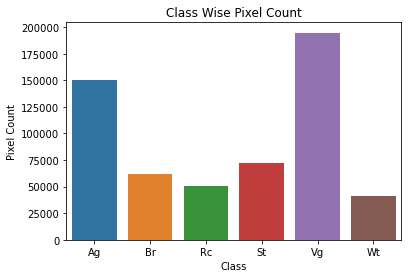

In [73]:
import seaborn as sns
df0 = pd.DataFrame(d.items())
ax = sns.barplot(x=le.classes_, y=1, data=df0)
ax.set(xlabel = 'Class', ylabel='Pixel Count', title='Class Wise Pixel Count')

In [74]:
final_df=pd.DataFrame()
df_0=dataset.loc[dataset['class']==0] #data.loc[(data.Brand == 'Maruti') & (data.Mileage > 25)]
df_0['Name']='Ag'
df_0['Area(m2)']=150880500
final_df=final_df.append(df_0)
df_1=dataset.loc[dataset['class']==1] 
df_1['Name']='Br'
df_1['Area(m2)']=55854900
final_df=final_df.append(df_1)
df_2=dataset.loc[dataset['class']==2] 
df_2['Name']='Rc'
df_2['Area(m2)']=44010900
final_df=final_df.append(df_2)
df_3=dataset.loc[dataset['class']==3] 
df_3['Name']='St'
df_3['Area(m2)']=52658100
final_df=final_df.append(df_3)
df_4=dataset.loc[dataset['class']==4] 
df_4['Name']='Vg'
df_4['Area(m2)']=175909500
final_df=final_df.append(df_4)
df_5=dataset.loc[dataset['class']==5] 
df_5['Name']='Wt'
df_5['Area(m2)']=34881300
final_df=final_df.append(df_5)

C:\Users\Student\AppData\Local\Temp\ipykernel_15516\2539308796.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_0['Name']='Ag'
C:\Users\Student\AppData\Local\Temp\ipykernel_15516\2539308796.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_0['Area(m2)']=150880500
C:\Users\Student\AppData\Local\Temp\ipykernel_15516\2539308796.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df=final_df.append(df_0)
C:

In [75]:
final_df.head()

,b1,b2,b3,b4,b5,b6,class,Name,Area(m2)
11,423.979187,711.979187,728.479187,2511.979248,2155.479248,1340.979248,0,Ag,150880500
73,419.999298,791.999329,894.499329,2543.999268,2528.499268,1749.499268,0,Ag,150880500
84,428.472992,731.473022,747.973022,2493.972900,1999.473022,1260.973022,0,Ag,150880500
91,450.971100,687.971069,749.971069,2316.471191,1738.971069,1093.971069,0,Ag,150880500
237,376.005951,604.505920,702.505920,1893.005981,1998.005981,1304.005981,0,Ag,150880500


In [76]:
final_df

,b1,b2,b3,b4,b5,b6,class,Name,Area(m2)
11,423.979187,711.979187,728.479187,2511.979248,2155.479248,1340.979248,0,Ag,150880500
73,419.999298,791.999329,894.499329,2543.999268,2528.499268,1749.499268,0,Ag,150880500
84,428.472992,731.473022,747.973022,2493.972900,1999.473022,1260.973022,0,Ag,150880500
91,450.971100,687.971069,749.971069,2316.471191,1738.971069,1093.971069,0,Ag,150880500
237,376.005951,604.505920,702.505920,1893.005981,1998.005981,1304.005981,0,Ag,150880500
...,...,...,...,...,...,...,...,...,...
571250,462.917999,675.417969,606.917969,3018.417969,1826.417969,906.417969,5,Wt,34881300
571276,245.842087,490.342102,347.842102,2547.342041,1071.342041,450.342102,5,Wt,34881300
571294,246.824570,480.824585,332.824585,2676.324463,1069.324585,439.824585,5,Wt,34881300
571303,391.479675,658.479675,624.479675,1568.979614,1123.979614,793.479675,5,Wt,34881300


In [77]:
import seaborn as sns

In [78]:
final_df.head()

,b1,b2,b3,b4,b5,b6,class,Name,Area(m2)
11,423.979187,711.979187,728.479187,2511.979248,2155.479248,1340.979248,0,Ag,150880500
73,419.999298,791.999329,894.499329,2543.999268,2528.499268,1749.499268,0,Ag,150880500
84,428.472992,731.473022,747.973022,2493.972900,1999.473022,1260.973022,0,Ag,150880500
91,450.971100,687.971069,749.971069,2316.471191,1738.971069,1093.971069,0,Ag,150880500
237,376.005951,604.505920,702.505920,1893.005981,1998.005981,1304.005981,0,Ag,150880500


In [79]:
df_00=dataset.loc[dataset['class']==0]
c0b=[]
df_00.mean()

b1           474.467133
b2           781.917419
b3           840.067139
b4          2514.859131
b5          2136.382812
b6          1362.231079
class          0.000000
Name                NaN
Area(m2)            NaN
dtype: float64

In [80]:
c0b=[479,788,850,2513,2143,1372]

In [81]:
df_11=dataset.loc[dataset['class']==1]
df_11.mean()

b1           579.559204
b2           849.472595
b3           975.976196
b4          2470.978271
b5          2671.149170
b6          1836.675293
class          1.000000
Name                NaN
Area(m2)            NaN
dtype: float64

In [82]:
c1b=[560,823,934,2443,2588,1774]
df_22=dataset.loc[dataset['class']==2]
df_22.mean()

b1           526.363831
b2           755.318176
b3           860.886902
b4          2156.436035
b5          2432.585449
b6          1722.522095
class          2.000000
Name                NaN
Area(m2)            NaN
dtype: float64

In [83]:
c2b=[530,758,870,2138,2459,1751]

In [84]:
df_33=dataset.loc[dataset['class']==3]

In [85]:
df_33.mean()

b1           565.228394
b2           860.857483
b3           941.057922
b4          2346.358398
b5          2216.201904
b6          1600.273438
class          3.000000
Name                NaN
Area(m2)            NaN
dtype: float64

In [86]:
c3b=[592,887,978,2305,2261,1680]

In [87]:
df_44=dataset.loc[dataset['class']==4]
df_44.mean()

b1           338.486969
b2           607.378052
b3           543.410156
b4          2647.256348
b5          1749.995483
b6           958.882446
class          4.000000
Name                NaN
Area(m2)            NaN
dtype: float64

In [88]:
c4b=[340,609,546,2646,1760,966]

In [89]:
df_55=dataset.loc[dataset['class']==5]
df_55.mean()

b1           429.366211
b2           685.812256
b3           644.071777
b4          1788.331543
b5          1372.237915
b6           864.494690
class          5.000000
Name                NaN
Area(m2)            NaN
dtype: float64

In [90]:
c5b=[421,682,625,1821,1320,808]

In [91]:
cb=[c0b,c1b,c2b,c3b,c4b,c5b]


In [92]:
data_v=pd.DataFrame(cb,columns=['b1','b2','b3','b4','b5','b6'])
data_v

,b1,b2,b3,b4,b5,b6
0,479,788,850,2513,2143,1372
1,560,823,934,2443,2588,1774
2,530,758,870,2138,2459,1751
3,592,887,978,2305,2261,1680
4,340,609,546,2646,1760,966
5,421,682,625,1821,1320,808


In [93]:
data_v['Class']=None
for i in range(6):
    data_v['Class'][i]=i
data_v

C:\Users\Student\AppData\Local\Temp\ipykernel_15516\3430840719.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_v['Class'][i]=i


,b1,b2,b3,b4,b5,b6,Class
0,479,788,850,2513,2143,1372,0
1,560,823,934,2443,2588,1774,1
2,530,758,870,2138,2459,1751,2
3,592,887,978,2305,2261,1680,3
4,340,609,546,2646,1760,966,4
5,421,682,625,1821,1320,808,5


In [94]:
data_v['Name']=le.classes_

In [95]:
data_v

,b1,b2,b3,b4,b5,b6,Class,Name
0,479,788,850,2513,2143,1372,0,Ag
1,560,823,934,2443,2588,1774,1,Br
2,530,758,870,2138,2459,1751,2,Rc
3,592,887,978,2305,2261,1680,3,St
4,340,609,546,2646,1760,966,4,Vg
5,421,682,625,1821,1320,808,5,Wt


In [96]:
ar=final_df['Area(m2)'].unique()

In [97]:
ar

array([150880500,  55854900,  44010900,  52658100, 175909500,  34881300],
      dtype=int64)

In [98]:
data_v['Area(m2)']=ar

In [99]:
data_v

,b1,b2,b3,b4,b5,b6,Class,Name,Area(m2)
0,479,788,850,2513,2143,1372,0,Ag,150880500
1,560,823,934,2443,2588,1774,1,Br,55854900
2,530,758,870,2138,2459,1751,2,Rc,44010900
3,592,887,978,2305,2261,1680,3,St,52658100
4,340,609,546,2646,1760,966,4,Vg,175909500
5,421,682,625,1821,1320,808,5,Wt,34881300


([<matplotlib.patches.Wedge at 0x1aa884dd520>,
 [Text(0.6647918418844924, 0.8763856496793088, 'Ag'),
  Text(-0.6338809325679376, 0.8989966425559117, 'Br'),
  Text(-1.0346222831335707, 0.37357292627207034, 'Rc'),
  Text(-1.0673861867365593, -0.26586975827270676, 'St'),
  Text(0.07672497622113182, -1.0973209548823293, 'Vg'),
  Text(1.0751144338495764, -0.23265630042684207, 'Wt')])

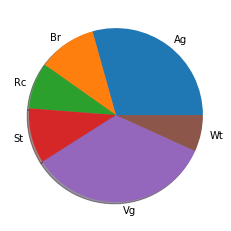

In [100]:
plt.pie(data_v['Area(m2)'],labels=data_v['Name'],shadow=True)